## 2.3.4 Challenge: Iterate and evaluate your classifier

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
imdb_raw = pd.read_csv('imdb_labelled.txt', '\t', header=None)
imdb_raw.columns = ['text', 'sentiment']

In [3]:
#Bad review keywords

#I randomnly chose these words from the bad reviews from the imdb_labelled.txt file

keywords = ['aimless', 'disappointed', 'lacks', 'wasted', 'mediocre', 'unfunny', 'predictable', 
            'obvious', 'lame', 'far', 'worst', 'slow', 'boring', 'bored', 'bad', 'awful', 'terrible', 
            'waste', 'negative', 'walked out', 'flat', 'problem', 'below average', 'long', 'little', 
            'aimless', 'insulting', 'avoid', 'hard to watch', 'annoying', 'annoyed', 'annoyingly','boredom', 
            'crap', 'bs', 'crazy', 'disapprove', 'disgusted', 'disgust', 'embarrassing', 'embarrass', 
            'god-awful', 'hate', 'hated', 'horrid', 'idiots', 'idiot', 'ill-advised', 'ill-conceived', 
            'implausible', 'impossible', 'inaccurate', 'infuriate', 'junk', 'lacked', 'mad', 'miss', 'offend', 
            'offended', 'overdone', 'overplayed', 'retard', 'retarded', 'rotten', 'shit', 'silly', 
            'slow-moving', 'stink', 'stunk', 'sub-par', 'tank', 'tanked', 'trash', 'unhappy', 'upset', 
            'one-dimensional', "can't recommend" ]

#Columns to identify if keyword in review
for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
        str(key), 
        case=False
    )

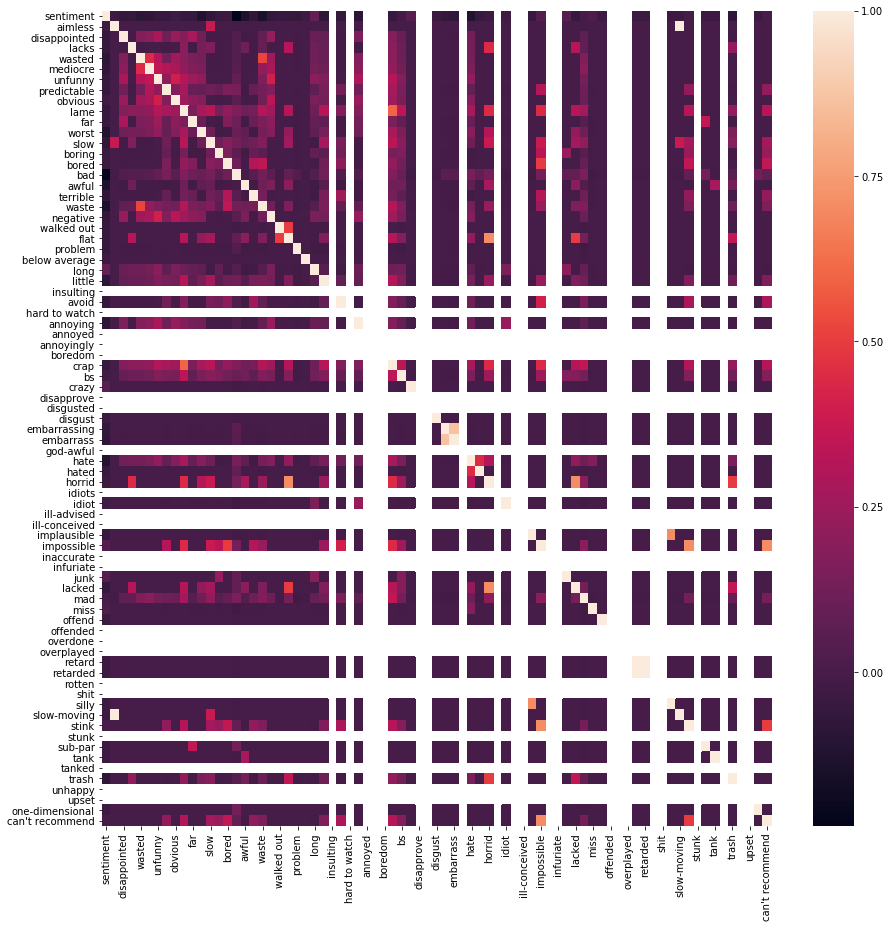

In [4]:
#Heatmap to show independence
plt.figure(figsize=(15, 15))
sns.heatmap(imdb_raw.corr())

In [5]:
#identifying initial percent positive and negative
raw_count = imdb_raw.sentiment.value_counts()
print('Total\nPercent Positive: {}\tPercent Negative: {}'.format(100*raw_count[0]/(imdb_raw.shape[0]), 100*raw_count[1]/(imdb_raw.shape[0]))) 

#splitting imdb data into train and test groups - 75%/25%
np.random.seed(222)
imdb_train = imdb_raw.sample(frac=0.75, replace=False)
imdb_test = imdb_raw.sample(frac=0.25, replace=False)

#identifying train and test percent positive and negative
raw_count_train = imdb_train.sentiment.value_counts()
print('Train\nPercent Positive: {}\tPercent Negative: {}'.format(100*raw_count_train[0]/(imdb_train.shape[0]), 100*raw_count_train[1]/(imdb_train.shape[0]))) 

raw_count_test = imdb_test.sentiment.value_counts()
print('Test\nPercent Positive: {}\tPercent Negative: {}'.format(100*raw_count_test[0]/(imdb_test.shape[0]), 100*raw_count_test[1]/(imdb_test.shape[0])))

Total
Percent Positive: 48.39572192513369	Percent Negative: 51.60427807486631
Train
Percent Positive: 47.05882352941177	Percent Negative: 52.94117647058823
Test
Percent Positive: 49.73262032085562	Percent Negative: 50.26737967914438


In [6]:
#x and y values
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

### Original model

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Importing confussion matrix
from sklearn.metrics import confusion_matrix

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
y_pred_test = bnb.predict(data_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred_test).sum()
))

#percent mislabeled
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')

Number of mislabeled points out of a total 187 points : 52
Accuracy:  72.192513369 %
[[44 49]
 [ 3 91]]
Sensitivity:  96.8085106383 %
Specificity:  47.311827957 %


### Iteration with half the number of features

In [8]:
keywords = ['aimless', 'disappointed', 'lacks', 'wasted', 'mediocre', 'unfunny', 'predictable', 
            'obvious', 'lame', 'far', 'worst', 'slow', 'boring', 'bored', 'bad', 'awful', 'terrible', 
            'waste', 'negative', 'walked out', 'flat', 'problem', 'below average', 'long', 'little', 
            'aimless', 'insulting', 'avoid', 'hard to watch', 'annoying', 'annoyed', 'annoyingly','boredom', 
            'crap', 'bs', 'crazy', 'disapprove', 'disgusted', 'disgust', 'embarrassing', 'embarrass']

#Columns to identify if keyword in review
for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
        str(key), 
        case=False
    )
    
#Splitting imdb data into train and test groups - 75%/25%
np.random.seed(222)
imdb_train = imdb_raw.sample(frac=0.75, replace=False)
imdb_test = imdb_raw.sample(frac=0.25, replace=False)


#Identifying x and y values for train and test
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

In [9]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
y_pred_test = bnb.predict(data_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred_test).sum()
))

#percent mislabeled
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')

Number of mislabeled points out of a total 187 points : 55
Accuracy:  70.5882352941 %
[[41 52]
 [ 3 91]]
Sensitivity:  96.8085106383 %
Specificity:  44.0860215054 %


### Modeling on single keywords

In [10]:
i = 0

for i in np.arange(len(keywords)):
    
    data = data_train.iloc[:, i:i+1]
    
    # Initializing NB
    
    bnb = BernoulliNB()
    
    # Training model 
    
    bnb.fit(data, target_train)
    
    # Classifying test data
    
    y_pred_test = bnb.predict(data_test.iloc[:, i:i+1])

    # Statistics
    print('Feature {}: {}'.format(i, keywords[i]))
    print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
    conf = confusion_matrix(target_test, y_pred_test)
    print(conf)
    print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
    print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
    print()
    i += 1

Feature 0: aimless
Accuracy:  50.2673796791 %
[[ 0 93]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 1: disappointed
Accuracy:  50.2673796791 %
[[ 1 92]
 [ 1 93]]
Sensitivity:  98.9361702128 %
Specificity:  1.0752688172 %

Feature 2: lacks
Accuracy:  50.8021390374 %
[[ 1 92]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  1.0752688172 %

Feature 3: wasted
Accuracy:  51.3368983957 %
[[ 2 91]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  2.15053763441 %

Feature 4: mediocre
Accuracy:  51.3368983957 %
[[ 2 91]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  2.15053763441 %

Feature 5: unfunny
Accuracy:  50.2673796791 %
[[ 0 93]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 6: predictable
Accuracy:  51.871657754 %
[[ 3 90]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  3.22580645161 %

Feature 7: obvious
Accuracy:  50.2673796791 %
[[ 0 93]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 8: lame
Accuracy:  50.2673796791 %
[[ 0 93]
 [ 0 94]]
Sensitivity:

In [11]:
i = 1
kw = keywords[0:1] + keywords[4:6] + keywords[10:12]

data_train = imdb_train[kw]
target_train = imdb_train['sentiment']

data_test = imdb_test[kw]
target_test = imdb_test['sentiment']
    
#Initializing NB

bnb = BernoulliNB()

#Training model 

bnb.fit(data_train, target_train)

#Classifying test data

y_pred_test = bnb.predict(data_test)

#percent mislabeled
print('Features: ', kw)
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
i += 1

Features:  ['aimless', 'mediocre', 'unfunny', 'worst', 'slow']
Accuracy:  54.5454545455 %
[[ 8 85]
 [ 0 94]]
Sensitivity:  100.0 %
Specificity:  8.60215053763 %
